# **Production**

## Sauvegarde des modèles

Voir dernière section du notebook précédent, `best_model_search.ipynb`.

## Libs et dépendances

Il existe plusieurs modules concurrents sur pour lister et visualiser les dépendances des librairies principales utilisées.

Ils ont en commun d'être documenté pour une utilisation en ligne de commande, et non de type programmatique par introspection.

Quelques libs à essayer :
* [**`pipdeptree`**](https://pypi.org/project/pipdeptree/).
* [**`deptree`**](https://pypi.org/project/deptree/).
* [**`pipgrip`**](https://pypi.org/project/pipgrip/).
* [**`johnnydep`**](https://pypi.org/project/johnnydep/).

Ce post stackoverflow pourrait aider : https://stackoverflow.com/questions/21336323/show-reverse-dependencies-with-pip

Is it possible to show the reverse dependencies with pip?

I want to know which package needs package foo. And which version of foo is needed by this package.

In [10]:
import pkg_resources
import sys
import sklearn

def find_reverse_deps(package_name):
    return [
        pkg.project_name for pkg in pkg_resources.WorkingSet()
        if package_name in {req.project_name for req in pkg.requires()}
    ]

print(find_reverse_deps("pandas"))
print(find_reverse_deps("sklearn"))

['evidently', 'fastparquet', 'gspread-pandas', 'seaborn', 'statsmodels', 'xarray']
[]


In [11]:
import pkg_resources

def get_dependency_tree(package_name, indent=0):
    package = pkg_resources.get_distribution(package_name)
    dependencies = package.requires()

    print(f"{' ' * indent}{package_name}")

    for dependency in dependencies:
        get_dependency_tree(str(dependency), indent=indent+2)

get_dependency_tree("pandas")

pandas
  python-dateutil>=2.8.2
    six>=1.5
  pytz>=2020.1
  tzdata>=2022.1
  numpy>=1.21.0; python_version >= "3.10"
  numpy>=1.23.2; python_version >= "3.11"


Construction de l'arbre de dépendances avec détection des éventuelles dépendances circulaires :

SPEC livrable *un fichier listant les packages utilisés seront présents dans les dossiers*

L'outil que nous avons développé construit l'arbre de dépendances partant des modules racines et indique pour chaque noeud enfant, la contrainte d'encadrement de version, et la version actullement installée.

In [1]:
from pepper.deps import get_dependency_tree
display(get_dependency_tree("numpy"))
display(get_dependency_tree("pandas", verbose=True))
display(get_dependency_tree("scikit-learn"))
display(get_dependency_tree("matplotlib"))
display(get_dependency_tree("seaborn"))
display(get_dependency_tree("lightgbm"))
display(get_dependency_tree("pyarrow"))
display(get_dependency_tree("numexpr"))
display(get_dependency_tree("graphviz"))
# Compléter avec toutes les librairies principales utilisées en tant que racines

{'numpy': {'version': '1.24.2', 'dependencies': None}}

/pandas 2.0.0
  python-dateutil>=2.8.2
  pytz>=2020.1
  tzdata>=2022.1
  numpy>=1.21.0; python_version >= "3.10"
  numpy>=1.23.2; python_version >= "3.11"
  pandas/python-dateutil 2.8.2
    six>=1.5
    pandas/python-dateutil/six 1.16.0
  pandas/pytz 2023.3
  pandas/tzdata 2023.3
  pandas/numpy 1.24.2
  pandas/numpy 1.24.2


{'pandas': {'version': '2.0.0',
  'dependencies': {'python-dateutil': {'requirement': 'python-dateutil>=2.8.2',
    'version': '2.8.2',
    'dependencies': {'six': {'requirement': 'six>=1.5',
      'version': '1.16.0',
      'dependencies': None}}},
   'pytz': {'requirement': 'pytz>=2020.1',
    'version': '2023.3',
    'dependencies': None},
   'tzdata': {'requirement': 'tzdata>=2022.1',
    'version': '2023.3',
    'dependencies': None},
   'numpy': {'requirement': 'numpy>=1.23.2; python_version >= "3.11"',
    'version': '1.24.2',
    'dependencies': None}}}}

{'scikit-learn': {'version': '1.2.2',
  'dependencies': {'numpy': {'requirement': 'numpy>=1.17.3',
    'version': '1.24.2',
    'dependencies': None},
   'scipy': {'requirement': 'scipy>=1.3.2',
    'version': '1.10.1',
    'dependencies': {'numpy': {'requirement': 'numpy<1.27.0,>=1.19.5',
      'version': '1.24.2',
      'dependencies': None}}},
   'joblib': {'requirement': 'joblib>=1.1.1',
    'version': '1.2.0',
    'dependencies': None},
   'threadpoolctl': {'requirement': 'threadpoolctl>=2.0.0',
    'version': '3.1.0',
    'dependencies': None}}}}

{'matplotlib': {'version': '3.7.1',
  'dependencies': {'contourpy': {'requirement': 'contourpy>=1.0.1',
    'version': '1.0.7',
    'dependencies': {'numpy': {'requirement': 'numpy>=1.16',
      'version': '1.24.2',
      'dependencies': None}}},
   'cycler': {'requirement': 'cycler>=0.10',
    'version': '0.11.0',
    'dependencies': None},
   'fonttools': {'requirement': 'fonttools>=4.22.0',
    'version': '4.39.3',
    'dependencies': None},
   'kiwisolver': {'requirement': 'kiwisolver>=1.0.1',
    'version': '1.4.4',
    'dependencies': None},
   'numpy': {'requirement': 'numpy>=1.20',
    'version': '1.24.2',
    'dependencies': None},
   'packaging': {'requirement': 'packaging>=20.0',
    'version': '23.0',
    'dependencies': None},
   'pillow': {'requirement': 'pillow>=6.2.0',
    'version': '9.5.0',
    'dependencies': None},
   'pyparsing': {'requirement': 'pyparsing>=2.3.1',
    'version': '3.0.9',
    'dependencies': None},
   'python-dateutil': {'requirement': 'python-date

{'matplotlib': {'version': '3.7.1',
  'dependencies': {'contourpy': {'requirement': 'contourpy>=1.0.1',
    'version': '1.0.7',
    'dependencies': {'numpy': {'requirement': 'numpy>=1.16',
      'version': '1.24.2',
      'dependencies': None}}},
   'cycler': {'requirement': 'cycler>=0.10',
    'version': '0.11.0',
    'dependencies': None},
   'fonttools': {'requirement': 'fonttools>=4.22.0',
    'version': '4.39.3',
    'dependencies': None},
   'kiwisolver': {'requirement': 'kiwisolver>=1.0.1',
    'version': '1.4.4',
    'dependencies': None},
   'numpy': {'requirement': 'numpy>=1.20',
    'version': '1.24.2',
    'dependencies': None},
   'packaging': {'requirement': 'packaging>=20.0',
    'version': '23.0',
    'dependencies': None},
   'pillow': {'requirement': 'pillow>=6.2.0',
    'version': '9.5.0',
    'dependencies': None},
   'pyparsing': {'requirement': 'pyparsing>=2.3.1',
    'version': '3.0.9',
    'dependencies': None},
   'python-dateutil': {'requirement': 'python-date

{'seaborn': {'version': '0.12.2',
  'dependencies': {'numpy': {'requirement': 'numpy!=1.24.0,>=1.17',
    'version': '1.24.2',
    'dependencies': None},
   'pandas': {'requirement': 'pandas>=0.25',
    'version': '2.0.0',
    'dependencies': {'python-dateutil': {'requirement': 'python-dateutil>=2.8.2',
      'version': '2.8.2',
      'dependencies': {'six': {'requirement': 'six>=1.5',
        'version': '1.16.0',
        'dependencies': None}}},
     'pytz': {'requirement': 'pytz>=2020.1',
      'version': '2023.3',
      'dependencies': None},
     'tzdata': {'requirement': 'tzdata>=2022.1',
      'version': '2023.3',
      'dependencies': None},
     'numpy': {'requirement': 'numpy>=1.23.2; python_version >= "3.11"',
      'version': '1.24.2',
      'dependencies': None}}},
   'matplotlib': {'requirement': 'matplotlib!=3.6.1,>=3.1',
    'version': '3.7.1',
    'dependencies': {'contourpy': {'requirement': 'contourpy>=1.0.1',
      'version': '1.0.7',
      'dependencies': {'numpy': 

{'lightgbm': {'version': '3.3.5',
  'dependencies': {'wheel': {'requirement': 'wheel',
    'version': '0.40.0',
    'dependencies': None},
   'numpy': {'requirement': 'numpy',
    'version': '1.24.2',
    'dependencies': None},
   'scipy': {'requirement': 'scipy',
    'version': '1.10.1',
    'dependencies': {'numpy': {'requirement': 'numpy<1.27.0,>=1.19.5',
      'version': '1.24.2',
      'dependencies': None}}},
   'scikit-learn': {'requirement': 'scikit-learn!=0.22.0',
    'version': '1.2.2',
    'dependencies': {'numpy': {'requirement': 'numpy>=1.17.3',
      'version': '1.24.2',
      'dependencies': None},
     'scipy': {'requirement': 'scipy>=1.3.2',
      'version': '1.10.1',
      'dependencies': {'numpy': {'requirement': 'numpy<1.27.0,>=1.19.5',
        'version': '1.24.2',
        'dependencies': None}}},
     'joblib': {'requirement': 'joblib>=1.1.1',
      'version': '1.2.0',
      'dependencies': None},
     'threadpoolctl': {'requirement': 'threadpoolctl>=2.0.0',
      

{'pyarrow': {'version': '11.0.0',
  'dependencies': {'numpy': {'requirement': 'numpy>=1.16.6',
    'version': '1.24.2',
    'dependencies': None}}}}

{'numexpr': {'version': '2.8.4',
  'dependencies': {'numpy': {'requirement': 'numpy>=1.13.3',
    'version': '1.24.2',
    'dependencies': None}}}}

{'graphviz': {'version': '0.20.1', 'dependencies': None}}

Liste des racines relevée manuellement.

Mlflow ne s'excutant qu'en Python 3.10, son relevé est fait séparément.

In [17]:
# "os", "glob", "re", "collections", "locale", "time", "timeit", "datetime", "calendar",
# "threading", "inspect", "itertools", "contextlib", "warnings", "pkg_resources"
main_packs = [
    "typing_extensions", "ipython", "gspread_pandas",
    "numpy", "pandas", "scipy", "statsmodels", "scikit-learn",
    "matplotlib", "seaborn", "pyarrow", "numexpr",
    "lightgbm", "evidently", "imblearn"
]

In [24]:
from pepper.deps import get_dependency_tree
import json
all_deps_dict = {}
for main_pack in main_packs:
    all_deps_dict.update(get_dependency_tree(main_pack))
display(all_deps_dict)
with open("../../_deliverable/packages.json", "w", encoding="utf-8") as f:
    json.dump(all_deps_dict, f, ensure_ascii=False, indent=4)

{'typing_extensions': {'version': '4.5.0', 'dependencies': None},
 'ipython': {'version': '8.12.0',
  'dependencies': {'backcall': {'requirement': 'backcall',
    'version': '0.2.0',
    'dependencies': None},
   'decorator': {'requirement': 'decorator',
    'version': '5.1.1',
    'dependencies': None},
   'jedi': {'requirement': 'jedi>=0.16',
    'version': '0.18.2',
    'dependencies': {'parso': {'requirement': 'parso<0.9.0,>=0.8.0',
      'version': '0.8.3',
      'dependencies': None}}},
   'matplotlib-inline': {'requirement': 'matplotlib-inline',
    'version': '0.1.6',
    'dependencies': {'traitlets': {'requirement': 'traitlets',
      'version': '5.9.0',
      'dependencies': None}}},
   'pickleshare': {'requirement': 'pickleshare',
    'version': '0.7.5',
    'dependencies': None},
   'prompt-toolkit': {'requirement': 'prompt-toolkit!=3.0.37,<3.1.0,>=3.0.30',
    'version': '3.0.38',
    'dependencies': {'wcwidth': {'requirement': 'wcwidth',
      'version': '0.2.6',
      'd

# Documentation

L'outil `sphinx` permet de générer de la documentation, et notamment un fichier `rst` des dépendances. 

In [4]:
pip install sphinx

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.0 MB 10.7 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 25.4 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 27.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/120.6 kB ? eta -:--:--
     -------------------------------------- 120.6/120.6 kB 6.9 MB/s eta 0:00:00
  Using cached sphinxcontrib_devhelp-1.0.2-py2.py3-none-any.whl (84 kB)
  Using cached sphinxcontrib_jsmath-1.0.1-py2.py3-none-any.whl (5.1 kB)
     ---------------------------------------- 0.0/99.8 kB ? eta -:--:--
     ---------------------------------------- 99.8/99.8 kB ? eta 0:00:00
  Using cached sphinxcontrib_serializinghtml-1.1.5-py2.py3-none-any.whl (94 kB)
  Using cached sphinxcontrib_qthelp-1.0.3-py2.py3-none-any.whl (90 kB)
  Using cached docutils-0.19-py3-


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Sphinx permet de *boostraper* un projet de documentation à l'aide de la commande `sphinx-quickstart`.

Une fois ce projet créé, le fichier `conf.py` permet d'en personnaliser les options (par exemple, le répertoire contenant la documentation).

In [ ]:
sphinx-quickstart

La commande `sphinx-apidoc` permet de générer la documentation du code.

se déplacer dans le dossier docs générer et y lancer `make html`.

# MLFlow

## Installation

Premier problème rencontré, MLFlow ne fonctionne pas avec Python 3.11.

Installation et production sur Python 3.10 :

```sh
$py3105 -m pip install mlflow[extras]
```

## Initialisation d'une expérience

Pour suivre une expérience d'entraînement : `mlflow.start_run()`.

In [ ]:
import mlflow

# Start an MLflow run
with mlflow.start_run():
    # Log parameters
    mlflow.log_param("learning_rate", 0.01)
    mlflow.log_param("batch_size", 32)

    # Train your model and log metrics
    train_model()
    
    mlflow.log_metric("accuracy", 0.95)

En mode générique, voici ce qu'il faudrait écrire :

In [1]:
import mlflow
import mlflow.lightgbm
from home_credit.best_model_search import kfold_train_and_eval_model
from home_credit.lightgbm_kernel_v2 import get_opt_lgbm_classifier
from home_credit.load import load_prep_dataset

data_version = "baseline"
params_version = "default"
sample_version = "10k"
data = load_prep_dataset("baseline_v1")
sample_10k = data.sample(10_000)

# Define your LightGBM classifier
clf = get_opt_lgbm_classifier()

# Start a new MLflow run
with mlflow.start_run():

    # Log clf hyperparameters
    mlflow.log_params(clf.get_params())

    # Train and evaluate your model
    res = kfold_train_and_eval_model(
        sample_10k, clf, imb_sampler=None, scaler=None,
        verbosity=3
    )

    # Log resampled (imblearn) training and test sets
    resamples = res["resamples"]
    mlflow.log_artifact(resamples["X_train"], "resampled_train_set")
    mlflow.log_artifact(resamples["X_test"], "resampled_test_set")  # Celui-ci est sans intérêt en fait
    mlflow.log_artifact(resamples["y_train"], "resample_train_labels")

    # Log your predictions
    """
    Format des scores :
    {
        'F2': {
            'over_folds': [0.0, 0.019230769230769232, 0.008787346221441126, 0.0, 0.0],
            'overall': 0.005472455308281649},
        'AUC': {
            'over_folds': [0.7307598897762831, 0.7596071442483737, 0.7506489220312376, 0.7463495075449534, 0.765373946002362],
            'overall': 0.7505985643315459
        }
    }
    Les scores ne sont fournis que pour l'ensemble train
    puisque les labels de l'ensemble de test sont inconnus
    """
    scores = res["scores"]
    for sc_name, sc_val in res["scores"].items():
        mlflow.log_metric(f"{sc_name}_overall", sc_val["overall"])
        mlflow.log_metric(f"{sc_name}_over_folds", sc_val["over_folds"])


    """mlflow.log_metric("train_auc", res["scores"]["train"]["roc_auc"])
    mlflow.log_metric("test_auc", res["scores"]["test"]["roc_auc"])
    mlflow.log_metric("train_f1_macro", res["scores"]["train"]["f1_macro"])
    mlflow.log_metric("test_f1_macro", res["scores"]["test"]["f1_macro"])
    mlflow.log_metric("train_f1_micro", res["scores"]["train"]["f1_micro"])
    mlflow.log_metric("test_f1_micro", res["scores"]["test"]["f1_micro"])
    mlflow.log_metric("train_f1_weighted", res["scores"]["train"]["f1_weighted"])
    mlflow.log_metric("test_f1_weighted", res["scores"]["test"]["f1_weighted"])
    """

    #train_pred_proba = train_preds["proba"]  # tableau numpy
    #train_pred_discr = train_preds["discr"]  # tableau numpy
    #test_pred_proba = test_preds["proba"]  # tableau numpy
    #test_pred_discr = test_preds["discr"]  # tableau numpy

    preds = res["preds"]
    train_preds = preds["train"]
    test_preds = preds["test"]
    mlflow.log_artifact(train_preds["proba"], "train_pred_proba")
    mlflow.log_artifact(train_preds["discr"], "train_pred_discr")
    mlflow.log_artifact(test_preds["proba"], "test_pred_proba")
    mlflow.log_artifact(test_preds["discr"], "test_pred_discr")

    # Log your feature importances
    """
    Voici comment il a été construit :
    * en particulier, c'est un dataframe
    * chaque feature est évaluée sur chaque pli, il n'y a pas eu de groupby.mean
    # Get the feature importances for the current fold
    fold_imp = pd.DataFrame({
        "feature": feat_names,
        "importance": get_feat_imp_facade(clf),   # clf.feature_importances_,
        "fold": fold_id
    })
    """
    feat_imps = res["feat_imps"]
    for i, feat_imp in enumerate(feat_imps):
        mlflow.log_metric(f"feature_importance_{i}", feat_imp[1])

    # Log your LightGBM model
    mlflow.lightgbm.log_model(clf, "classifier")

# End of MLflow run


AttributeError: module 'mlflow.lightgbm' has no attribute 'log_params'

https://mlflow.org/docs/latest/python_api/mlflow.lightgbm.html

In [2]:
import mlflow
import mlflow.lightgbm
from home_credit.best_model_search import kfold_train_and_eval_model
from home_credit.lightgbm_kernel_v2 import get_opt_lgbm_classifier
from home_credit.load import load_prep_dataset

data_version = "baseline"
params_version = "default"
sample_version = "10k"
data = load_prep_dataset("baseline_v1")
sample_10k = data.sample(10_000)

# Define your LightGBM classifier
clf = get_opt_lgbm_classifier()

import mlflow
#from lightgbm import LGBMClassifier
#from sklearn import datasets


def print_auto_logged_info(run):
    tags = {k: v for k, v in run.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [
        f.path for f in mlflow.MlflowClient().list_artifacts(run.info.run_id, "model")
    ]
    feature_importances = [
        f.path
        for f in mlflow.MlflowClient().list_artifacts(run.info.run_id)
        if f.path != "model"
    ]
    print(f"run_id: {run.info.run_id}")
    print(f"artifacts: {artifacts}")
    print(f"feature_importances: {feature_importances}")
    print(f"params: {run.data.params}")
    print(f"metrics: {run.data.metrics}")
    print(f"tags: {tags}")


# Load iris dataset
#X, y = datasets.load_iris(return_X_y=True, as_frame=True)

# Initialize our model
#model = LGBMClassifier(objective="multiclass", random_state=42)

# Auto log all MLflow entities
mlflow.lightgbm.autolog()

# Train the model
with mlflow.start_run() as run:
    # Train and evaluate your model
    _ = kfold_train_and_eval_model(
        sample_10k, clf,  # imb_sampler=None, scaler=None,
        verbosity=3
    )

# fetch the auto logged parameters and metrics
print_auto_logged_info(mlflow.get_run(run_id=run.info.run_id))


Starting train and eval of:
Labeled dataset of shape: (10000, 790)
Features set of shape: (10000, 788)

With:
Classifier: 


LGBMClassifier(callbacks=None, colsample_bytree=0.9497036, learning_rate=0.02,
               max_depth=8, min_child_weight=39.3259775,
               min_split_gain=0.0222415, n_estimators=10000, n_jobs=4,
               num_leaves=34, reg_alpha=0.041545473, reg_lambda=0.0735294,
               subsample=0.8715623)

Loss function: 


{'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

Eval metrics: 


{'F2': <function home_credit.best_model_search.<lambda>(y_valid, y_pred)>,
 'AUC': <function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>}

On 5 KFolds: 

Resampling
Sampler: 


SMOTETomek()

Original dataset shape: Counter({0.0: 7925, -1.0: 1400, 1.0: 675})
Resampled dataset shape: Counter({1.0: 7720, -1.0: 7660, 0.0: 7589})

Train vs. test subsets shapes
	Train shape: (15309, 788)
	Test shape: (7660, 788)

Evaluate the 1-th fold (on 5)
[200]	training's binary_logloss: 0.144671	valid_1's binary_logloss: 0.160553
[400]	training's binary_logloss: 0.10585	valid_1's binary_logloss: 0.136375
[600]	training's binary_logloss: 0.0896832	valid_1's binary_logloss: 0.131287
[800]	training's binary_logloss: 0.0785996	valid_1's binary_logloss: 0.12876
[1000]	training's binary_logloss: 0.0702915	valid_1's binary_logloss: 0.127293
[1200]	training's binary_logloss: 0.0636793	valid_1's binary_logloss: 0.126452
[1400]	training's binary_logloss: 0.0583312	valid_1's binary_logloss: 0.125837
[1600]	training's binary_logloss: 0.0538169	valid_1's binary_logloss: 0.125495
[1800]	training's binary_logloss: 0.0500354	valid_1's binary_logloss: 0.125341
[2000]	training's binary_logloss: 0.0468624	val

2023/05/02 12:08:38 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\lightgbm.py", line 785, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\lightgbm.py", line 700, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\tracking\fluent.py", line 783, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\tracking\client.py", line 1023, in log_artifact
    self._tracking_client.log_artifact(run_id, local_path, artifact_path)
  File "c:\Users\franc\AppData\Lo

Fold  0 F2: 0.941781
Fold  0 AUC: 0.981904

Evaluate the 2-th fold (on 5)
[200]	training's binary_logloss: 0.145015	valid_1's binary_logloss: 0.153739
[400]	training's binary_logloss: 0.107728	valid_1's binary_logloss: 0.129371
[600]	training's binary_logloss: 0.0910885	valid_1's binary_logloss: 0.124017
[800]	training's binary_logloss: 0.0797233	valid_1's binary_logloss: 0.121289
[1000]	training's binary_logloss: 0.0709318	valid_1's binary_logloss: 0.119723
[1200]	training's binary_logloss: 0.0641641	valid_1's binary_logloss: 0.118073
[1400]	training's binary_logloss: 0.0586781	valid_1's binary_logloss: 0.117284
[1600]	training's binary_logloss: 0.054163	valid_1's binary_logloss: 0.116616
[1800]	training's binary_logloss: 0.0502925	valid_1's binary_logloss: 0.116053
[2000]	training's binary_logloss: 0.0470568	valid_1's binary_logloss: 0.115834
[2200]	training's binary_logloss: 0.044196	valid_1's binary_logloss: 0.115759


2023/05/02 12:11:04 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\lightgbm.py", line 785, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\lightgbm.py", line 700, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\tracking\fluent.py", line 783, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\tracking\client.py", line 1023, in log_artifact
    self._tracking_client.log_artifact(run_id, local_path, artifact_path)
  File "c:\Users\franc\AppData\Lo

Fold  1 F2: 0.941333
Fold  1 AUC: 0.986417

Evaluate the 3-th fold (on 5)
[200]	training's binary_logloss: 0.141972	valid_1's binary_logloss: 0.172614
[400]	training's binary_logloss: 0.104359	valid_1's binary_logloss: 0.149606
[600]	training's binary_logloss: 0.087792	valid_1's binary_logloss: 0.145934
[800]	training's binary_logloss: 0.0768366	valid_1's binary_logloss: 0.145024
[1000]	training's binary_logloss: 0.0682655	valid_1's binary_logloss: 0.14479
[1200]	training's binary_logloss: 0.0617567	valid_1's binary_logloss: 0.145104


2023/05/02 12:12:45 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\lightgbm.py", line 785, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\lightgbm.py", line 700, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\tracking\fluent.py", line 783, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\tracking\client.py", line 1023, in log_artifact
    self._tracking_client.log_artifact(run_id, local_path, artifact_path)
  File "c:\Users\franc\AppData\Lo

Fold  2 F2: 0.926661
Fold  2 AUC: 0.978856

Evaluate the 4-th fold (on 5)
[200]	training's binary_logloss: 0.142697	valid_1's binary_logloss: 0.171685
[400]	training's binary_logloss: 0.10529	valid_1's binary_logloss: 0.149554
[600]	training's binary_logloss: 0.0891012	valid_1's binary_logloss: 0.144942
[800]	training's binary_logloss: 0.0780751	valid_1's binary_logloss: 0.143521
[1000]	training's binary_logloss: 0.0697497	valid_1's binary_logloss: 0.14289
[1200]	training's binary_logloss: 0.0630004	valid_1's binary_logloss: 0.142806


2023/05/02 12:14:25 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\lightgbm.py", line 785, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\lightgbm.py", line 700, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\tracking\fluent.py", line 783, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\tracking\client.py", line 1023, in log_artifact
    self._tracking_client.log_artifact(run_id, local_path, artifact_path)
  File "c:\Users\franc\AppData\Lo

Fold  3 F2: 0.927251
Fold  3 AUC: 0.978500

Evaluate the 5-th fold (on 5)
[200]	training's binary_logloss: 0.143451	valid_1's binary_logloss: 0.164174
[400]	training's binary_logloss: 0.106166	valid_1's binary_logloss: 0.138829
[600]	training's binary_logloss: 0.0900249	valid_1's binary_logloss: 0.133592
[800]	training's binary_logloss: 0.0786878	valid_1's binary_logloss: 0.131814
[1000]	training's binary_logloss: 0.0703005	valid_1's binary_logloss: 0.130644
[1200]	training's binary_logloss: 0.0636934	valid_1's binary_logloss: 0.130089
[1400]	training's binary_logloss: 0.0581697	valid_1's binary_logloss: 0.129899
[1600]	training's binary_logloss: 0.053637	valid_1's binary_logloss: 0.129831


2023/05/02 12:16:22 ERROR mlflow.lightgbm: Failed to log feature importance plot. LightGBM autologging will ignore the failure and continue. Exception: 
Traceback (most recent call last):
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\lightgbm.py", line 785, in train_impl
    log_feature_importance_plot(features, importance, imp_type)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\lightgbm.py", line 700, in log_feature_importance_plot
    mlflow.log_artifact(filepath)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\tracking\fluent.py", line 783, in log_artifact
    MlflowClient().log_artifact(run_id, local_path, artifact_path)
  File "c:\Users\franc\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\tracking\client.py", line 1023, in log_artifact
    self._tracking_client.log_artifact(run_id, local_path, artifact_path)
  File "c:\Users\franc\AppData\Lo

Fold  4 F2: 0.930716
Fold  4 AUC: 0.983942
Full F2: 0.933514
Full AUC: 0.982045


MlflowException: Metric 'training-binary_logloss' is malformed; persisted metric data contained 1 fields. Expected 2 or 3 fields.

## Enregistrement d'un modèle entraîné

Fonction `mlflow.pyfunc.log_model`.

Dans cet exemple, nous avons entraîné un modèle et utilisé `mlflow.pyfunc.log_model()` pour l'enregistrer sous le nom "model". Le modèle sera stocké dans un emplacement par défaut (défini dans la configuration de MLflow) et peut être visualisé dans le registre de modèles de MLflow.

In [3]:
display(clf)

LGBMClassifier(callbacks=None, colsample_bytree=0.9497036, learning_rate=0.02,
               max_depth=8, min_child_weight=39.3259775,
               min_split_gain=0.0222415, n_estimators=10000, n_jobs=4,
               num_leaves=34, reg_alpha=0.041545473, reg_lambda=0.0735294,
               subsample=0.8715623)

In [5]:
import mlflow

# attention, il attend un chemin absolu !! au sens non relatif à un mlruns
mlflow.lightgbm.save_model(clf, "cheumain")

MlflowException: Path 'c:\Users\franc\Projects\pepper_credit_scoring_tool\notebooks\experiments\cheumain' already exists and is not empty

### A propos de mlruns

**Attention** très important :

Le serveur de tracking MLflow peut être exécuté de différentes manières, en fonction des besoins et des contraintes. 

Les options :
* **MLflow Tracking Server** : il s'agit d'un serveur dédié pour stocker les données de suivi de toutes les expériences MLflow. Il peut être exécuté sur une machine dédiée ou dans un cluster. Pour l'exécuter, il faut lancer la commande de terminal `py> mlflow server`.
* **MLflow Tracking dans une base de données** : il est également possible de configurer MLflow pour stocker les données de suivi dans une base de données relationnelle, telle que MySQL ou PostgreSQL, ou dans un système de stockage de données tel que S3.
* **MLflow Tracking hors connexion (local)** : à défaut de serveur, les données de suivi et les modèles enregistrés sont sont simplement stockées dans un dossier local `./mlruns/`.

Par exemple si l'on démarre une nouvelle expérience MLflow avec `mlflow.start_run()`, sans plus de formalités, pour y enregistrer métriques, hyperparamètres, artefacts et modèles sans avoir démarré de serveur MLflow, ces enregistrements vont être placés dans un dossier `./mlruns/` local.

Ceux-ci seront consultables depuis l'UI, si la commande

```terminal
$> py3105 -m mlflow ui
```

est lancée depuis le dossier parent du dossier `mlruns/`.

Il est également possible d'indiquer de lancer l'UI depuis un autre dossier en indiquant l'emplacement du dossier `mlruns/` avec la commande :

```terminal
$> py3105 -m mlflow ui --backend-store-uri <path_to_mlruns>
```



### Structure du dossier `mlruns/`

Concernant l'organisation des dossiers dans mlruns, voici un aperçu de la structure :

```
mlruns/
├── 0/
│   ├── <experiment_id>/
│   │   ├── artifacts/
│   │   ├── meta.yaml
│   │   ├── metrics/
│   │   ├── params/
│   │   ├── run.json
│   │   └── tags/
│   ├── models/
│   │   ├── <model_name>/
│   │   │   ├── <version>
│   │   │   │   ├── <model_file>
│   │   │   │   └── MLmodel
│   │   │   ├── <version>
│   │   │   │   ├── <model_file>
│   │   │   │   └── MLmodel
│   │   │   └── ...
│   │   └── ...
│   ├── meta.yaml
│   ├── metrics/
│   ├── params/
│   ├── artifacts/
│   ├── tags/
│   ├── run.json
│   └── ...
└── meta.yaml
```


Le dossier `0/` contient les méta-données pour chaque exécution enregistrée dans MLflow, tandis que le dossier `models/` contient les fichiers de modèles enregistrés, soit depuis l'UI, soit avec les fonctions `mlflow.<flavor>.log_model()` ou `mlflow.<flavor>.save_model()`.


-----


Le dossier 0 correspond à la première exécution de l'expérience. Chaque expérience sera ensuite stockée dans un dossier numéroté incrémentiellement. Chaque dossier d'expérience contient un certain nombre de sous-dossiers qui stockent les métriques, les paramètres, les artefacts et les métadonnées associés à chaque exécution de l'expérience. Les modèles enregistrés sont stockés dans le dossier models/, qui contient des sous-dossiers pour chaque modèle enregistré. Chaque sous-dossier de modèle contient des sous-dossiers pour chaque version du modèle enregistré.

Lorsque vous enregistrez un modèle à l'aide de l'une de ces fonctions, il sera enregistré dans le sous-dossier models/ sous un numéro de version unique, par exemple models/0/12345678901234567890123456789012, où 12345678901234567890123456789012 est le numéro de version du modèle. Les modèles enregistrés dans models/ peuvent être gérés et déployés à l'aide de l'API MLflow.

La structure de fichiers et de dossiers sous mlruns/ dépend des différents types d'objets MLflow que vous enregistrez, tels que des runs, des paramètres, des métriques, des artifacts, etc. Les sous-dossiers tels que 0/ et models/ sont créés automatiquement par MLflow en fonction des données que vous enregistrez. Il n'y a pas d'autres sous-dossiers racines qui se matérialisent dans mlruns/.

*Ce n'est pas exactement ce que j'observe.*

*log ou save_model enregistre en un dossier à path absolu fixé par l'utilisateur, donc potentiellement en dehors de tout dossier mlruns, en tous cas sans qu'il en soit un désigné comme mlruns de référence.*
*Par contre, si je lance l'UI, elle est associée à un dossier mlruns, et alors, si j'enregistre un modèle depuis l'API, cela crée un sous-dossier de mlruns/models/ du nom que je donne au modèle.*
*Les sous-dossiers de /mlruns/0 ont l'air de correspondre aux expériences, mais je n'en sus pas encore sûr.*

Effectivement, vous avez raison. Si vous enregistrez des métriques, des paramètres ou des artefacts via mlflow.log_*, ils seront enregistrés dans le répertoire par défaut spécifié par mlflow.set_tracking_uri() ou dans le dossier mlruns de l'emplacement courant si aucun n'a été spécifié.

En revanche, si vous utilisez mlflow.lightgbm.save_model() pour enregistrer un modèle, il sera enregistré dans le dossier spécifié, mais également enregistré comme une version de modèle associée à la même expérience active que les logs précédents. Cette expérience active sera celle qui a été créée lors de l'appel à mlflow.start_run() ou lors de l'utilisation de l'autologging. Cette expérience active est enregistrée dans le répertoire mlruns/0 par défaut.

In [ ]:
import mlflow.pyfunc

# Train your model
model = train_model()

# Log your model
mlflow.pyfunc.log_model("model", python_model=model, artifacts={})

In [3]:
import mlflow
from home_credit.load import get_mlflow_dir
print(mlflow.get_tracking_uri())
mlflow.set_tracking_uri(get_mlflow_dir())
print(mlflow.get_tracking_uri())

file:///c:/Users/franc/Projects/pepper_credit_scoring_tool/notebooks/experiments/mlruns
C:\Users\franc\Projects\pepper_credit_scoring_tool\tmp\mlruns


## Serveur de modèles et API Flask

Pour servir le modèle enregistré :
* `mlflow.pyfunc.load_model()` pour charger le modèle enregistré,
* et exposition d'API REST Flask pour lui demander d'effectuer des prédictions.

In [ ]:
import mlflow.pyfunc
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load your model
model = mlflow.pyfunc.load_model("model")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    prediction = model.predict(data)
    return jsonify(prediction.tolist())

if __name__ == '__main__':
    app.run(port=5000)

## MLflow UI

Pour visualiser les expériences et less modèles enregistrés dans `mlruns/`, utiliser l'UI.

Pour démarrer l'interface utilisateur :

`mlflow ui`

Puis accéder à l'interface utilisateur de MLflow depuis un navigateur.

# Tableau de bord interactif et suivi du Data drift

Réalisation d’un dashboard interactif avec Dash, Bakeh ou Streamlit.

Utilisation d’evidently pour détecter dans le futur le *data drift* : hypothèse que `data_train` représente la référence et `data_test` les données nouvelles dans le cadre de la production.

Mise en évidence du data drift sur les principales caractéristiques	à travers un tableau HTML à réaliser.

Déploiement de l’application dashboard et de l’API sur un cloud (gratuit) :Azure (ASP F1 gratuit) ou autre (PythonAnywhere et Heroku ne sont pas gratuits a priori).

## Installation d'`evidently`

`!pip install evidently`

## Imports nécessaires

In [3]:
import pandas as pd
from evidently.dashboard import Dashboard
from evidently.dashboard.tabs import DataDriftTab

## Charger les données de référence et les nouvelles données

In [5]:
from home_credit.load import load_prep_dataset
data = load_prep_dataset("baseline_v1")
ref_data = data[data.TARGET > -1]  # Charger les données de référence
new_data = data[data.TARGET == -1]  # Charger les nouvelles données
display(data)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CC_NAME_CONTRACT_STATUS_Sent_proposal_MIN_nan,CC_NAME_CONTRACT_STATUS_Sent_proposal_MAX_False,CC_NAME_CONTRACT_STATUS_Sent_proposal_MAX_True,CC_NAME_CONTRACT_STATUS_Sent_proposal_MAX_nan,CC_NAME_CONTRACT_STATUS_Signed_MIN_False,CC_NAME_CONTRACT_STATUS_Signed_MIN_True,CC_NAME_CONTRACT_STATUS_Signed_MIN_nan,CC_NAME_CONTRACT_STATUS_Signed_MAX_False,CC_NAME_CONTRACT_STATUS_Signed_MAX_True,CC_NAME_CONTRACT_STATUS_Signed_MAX_nan
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,True,False,False,True,False,False,True,False,False,True
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,True,False,False,True,False,False,True,False,False,True
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,True,False,False,True,False,False,True,False,False,True
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,True,False,False,True,False,False,True,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,True,False,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,-1,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,...,True,False,False,True,False,False,True,False,False,True
356251,456222,-1,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,...,True,False,False,True,False,False,True,False,False,True
356252,456223,-1,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,...,True,False,False,True,False,False,True,False,False,True
356253,456224,-1,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,...,True,False,False,True,False,False,True,False,False,True


## Créer un objet Dashboard et ajouter un onglet DataDriftTab

In [9]:
# Créer un objet Dashboard
#dashboard = Dashboard()

# Ajouter un onglet DataDriftTab
#data_drift_tab = DataDriftTab(title="Data Drift", ref_data=ref_data, test_data=new_data)
#dashboard.add_tab(data_drift_tab)

# dashboard = Dashboard(tabs=[DataDriftTab(title="Data Drift", ref_data=ref_data, test_data=new_data)])

Manifestement du code obsolète

TypeError: Tab.__init__() got an unexpected keyword argument 'title'

## Générer le tableau HTML

In [ ]:
# Générer le tableau HTML
dashboard.save("dashboard.html")

## Créer un dashboard interactif avec Dash, Bokeh ou Streamlit

Vous pouvez utiliser l'une de ces bibliothèques pour créer un dashboard interactif à partir du tableau HTML généré. Voici un exemple d'utilisation de Dash:

```Python
import dash
import dash_html_components as html
from dash.dependencies import Input, Output

# Créer l'application Dash
app = dash.Dash(__name__)

# Définir la mise en page de l'application
app.layout = html.Div([
    html.Iframe(id='dashboard', srcDoc=open('dashboard.html', 'r').read(),
                width='100%', height='600')
])

if __name__ == '__main__':
    # Lancer l'application Dash
    app.run_server(debug=True)
```

## Déployer l'application sur un cloud gratuit

Vous pouvez utiliser un service cloud gratuit comme Azure (**ASP F1 gratuit**) pour déployer votre application et votre API. Vous devrez suivre les instructions spécifiques à chaque service pour déployer votre application.

https://azure.microsoft.com/fr-fr/pricing/details/app-service/windows/

Gratuit et Partagé Préversion

Les plans de service Gratuit et Partagé (préversion) sont des niveaux de base qui s’exécutent sur les mêmes machines virtuelles Azure que les autres applications. Certaines applications peuvent appartenir à d’autres clients. Ces niveaux sont réservés à une utilisation à des fins de test et de développement. Aucun contrat SLA n’est fourni pour les plans de service Gratuit et Partagé. Les plans de service Gratuit et Partagé sont facturés par application.

Le tarif de l’abonnement Partagé (version préliminaire) comprend une remise pour la version préliminaire.

|Plan Gratuit|Cœurs|RAM|Stockage|À l'utilisation|
|-|-|-|-|-|
|**F1 Gratuit**|Partage (60 minutes processeur\jour)|1 Go|1,00 Go|$0|
|D1 Partage|Partage (240 minutes processeur\jour)|1 Go|1,00 Go|S.O. par site|

https://azure.microsoft.com/fr-fr/free/

Sign in - Verif

https://azure.microsoft.com/fr-fr/get-started/welcome-to-azure/

https://portal.azure.com/?quickstart=true#view/Microsoft_Azure_Resources/QuickstartCenterBlade

Create a Webapp https://portal.azure.com/?quickstart=true#view/Microsoft_Azure_Resources/QuickstartAnchorServicesBlade/goalId/create-a-web-app



## Exemple complet : Data drift dashboard in jupyter notebook

https://github.com/evidentlyai/evidently/blob/main/examples/data_stories/bicycle_demand_monitoring.ipynb

In [7]:
try:
    import evidently
except:
    !pip install git+https://github.com/evidentlyai/evidently.git

In [1]:
import pandas as pd
import numpy as np

import requests
import zipfile
import io

from datetime import datetime, time
from sklearn import datasets, ensemble

from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, RegressionPreset

### Bicycle Demand Data

Cette étape télécharge automatiquement un ensemble de données sur les locations de vélos à partir du site UCI. Cette version des données est légèrement différente de celle utilisée dans une compétition Kaggle. Si vous voulez que l'exemple soit identique à celui présenté dans le blog d'Evidently "Comment briser un modèle en 20 jours", vous pouvez télécharger manuellement les données à partir de Kaggle : https://www.kaggle.com/c/bike-sharing-demand/data

In [2]:
dataset_uri = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
content = requests.get(dataset_uri).content
with zipfile.ZipFile(io.BytesIO(content)) as arc:
    raw_data = pd.read_csv(
        arc.open("hour.csv"),
        header=0, sep=',',
        parse_dates=["dteday"], index_col="dteday"
)
display(raw_data.head(3))

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [3]:
raw_data.index = raw_data.apply(
    lambda row: datetime.combine(row.name, time(hour=int(row["hr"]))),
    axis=1
)

In [4]:
raw_data.head(3)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2011-01-01 00:00:00,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Modèle de régression

#### Entraînement du modèle

In [5]:
target = "cnt"
prediction = "prediction"
numerical_features = ["temp", "atemp", "hum", "windspeed", "hr", "weekday"]
categorical_features = ["season", "holiday", "workingday"]

In [6]:
reference = raw_data.loc["2011-01-01 00:00:00":"2011-01-28 23:00:00"]
current = raw_data.loc["2011-01-29 00:00:00":"2011-02-28 23:00:00"]

In [7]:
reference.head(3)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2011-01-01 00:00:00,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [8]:
regressor = ensemble.RandomForestRegressor(random_state=0, n_estimators=50)

In [9]:
regressor.fit(reference[numerical_features + categorical_features], reference[target])

RandomForestRegressor(n_estimators=50, random_state=0)

In [10]:
ref_prediction = regressor.predict(reference[numerical_features + categorical_features])
current_prediction = regressor.predict(current[numerical_features + categorical_features])

In [11]:
reference['prediction'] = ref_prediction
current['prediction'] = current_prediction

#### Rapport de performance du modèle

In [12]:
column_mapping = ColumnMapping()

column_mapping.target = target
column_mapping.prediction = prediction
column_mapping.numerical_features = numerical_features
column_mapping.categorical_features = categorical_features

In [13]:
regression_perfomance = Report(metrics=[RegressionPreset()])
regression_perfomance.run(current_data=reference, reference_data=None, column_mapping=column_mapping)

In [14]:
# regression_perfomance.show() pas très bon pour le notebook !

In [16]:
from home_credit.load import get_reports_dir
import os
report_name = "regression_performance_at_training"
report_filepath = os.path.join(get_reports_dir(), f"{report_name}.html")
regression_perfomance.save_html(report_filepath)

#### Rapport comparé semaine 1

In [17]:
regression_perfomance = Report(metrics=[RegressionPreset()])
regression_perfomance.run(
    current_data=current.loc['2011-01-29 00:00:00':'2011-02-07 23:00:00'], 
    reference_data=reference,
    column_mapping=column_mapping
)
# regression_perfomance.show()

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



In [18]:
# regression_perfomance.save('reports/regression_performance_after_week1.html')
from home_credit.load import get_reports_dir
import os
report_name = "regression_performance_after_week1"
report_filepath = os.path.join(get_reports_dir(), f"{report_name}.html")
regression_perfomance.save_html(report_filepath)

#### Rapport comparé semaine 2

In [ ]:
regression_perfomance = Report(metrics=[RegressionPreset()])
regression_perfomance.run(
    current_data=current.loc['2011-02-07 00:00:00':'2011-02-14 23:00:00'], 
    reference_data=reference,
    column_mapping=column_mapping
)
# regression_perfomance.show()

In [19]:
# regression_perfomance.save('reports/regression_performance_after_week2.html')
from home_credit.load import get_reports_dir
import os
report_name = "regression_performance_after_week2"
report_filepath = os.path.join(get_reports_dir(), f"{report_name}.html")
regression_perfomance.save_html(report_filepath)

#### Rapport comparé semaine 3

In [20]:
regression_perfomance = Report(metrics=[RegressionPreset()])
regression_perfomance.run(
    current_data=current.loc['2011-02-15 00:00:00':'2011-02-21 23:00:00'], 
    reference_data=reference,
    column_mapping=column_mapping
)
#regression_perfomance.show()

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



In [21]:
# regression_perfomance.save('reports/regression_performance_after_week3.html')
from home_credit.load import get_reports_dir
import os
report_name = "regression_performance_after_week3"
report_filepath = os.path.join(get_reports_dir(), f"{report_name}.html")
regression_perfomance.save_html(report_filepath)

#### Rapport de dérive des données

In [22]:
column_mapping = ColumnMapping()
column_mapping.numerical_features = numerical_features

In [25]:
data_drift = Report(metrics = [DataDriftPreset()])
data_drift.run(
    current_data = current.loc['2011-01-29 00:00:00':'2011-02-07 23:00:00'],
    reference_data = reference,
    column_mapping=column_mapping)
# data_drift.show()

In [26]:
# data_drift.save("reports/data_drift_dashboard_after_week1.html")
# regression_perfomance.save('reports/regression_performance_after_week3.html')
from home_credit.load import get_reports_dir
import os
report_name = "data_drift_dashboard_after_week1"
report_filepath = os.path.join(get_reports_dir(), f"{report_name}.html")
data_drift.save_html(report_filepath)

## C'est tout de même assez verbeux !

Réduisons cela à quelques lignes de codes, puis appliquons à notre cas cf. la demande.

### Clarification

Il s'agit de produire des rapports par tranches hebdomadaires (identifiables par un index temporel).

Nous évacuons le recouvrement des périodes qui n'est a priori pas justifié (recouvrement de 23h).

#### Chargement du jeu de données

In [1]:
import requests
import zipfile
import io
import pandas as pd

# Load the dataset
dataset_uri = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
content = requests.get(dataset_uri).content
with zipfile.ZipFile(io.BytesIO(content)) as arc:
    raw_data = pd.read_csv(
        arc.open("hour.csv"),
        header=0, sep=',',
        parse_dates=["dteday"], index_col="dteday"
)

#### Prétraitement de l'index

Cela n'est pas explicité, mais sinon le rapport n'étalera pas les données qui prendront une apparence discrète.

In [2]:
from home_credit.prod import refine_index
refine_index(raw_data)

#### Analyse succinte du jeu de données

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.3 MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
instant,17379,17379,0,1.0,1.000000,int64
season,17379,4,0,1.0,0.000230,int64
yr,17379,2,0,1.0,0.000115,int64
mnth,17379,12,0,1.0,0.000690,int64
hr,17379,24,0,1.0,0.001381,int64
holiday,17379,2,0,1.0,0.000115,int64
weekday,17379,7,0,1.0,0.000403,int64
workingday,17379,2,0,1.0,0.000115,int64
weathersit,17379,4,0,1.0,0.000230,int64
temp,17379,50,0,1.0,0.002877,float64


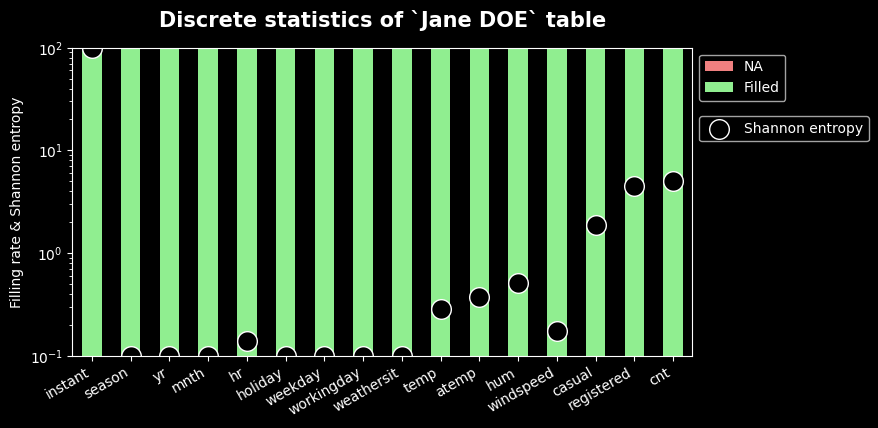

In [3]:
from pepper.utils import show_discrete_stats
# Analyse the dataset
raw_data.info()
display(raw_data.describe(include="all"))
show_discrete_stats(raw_data)

#### Distinction des variables par nature

Ici ce sont les caractéritiques catégorielles vs. les numériques.

Pour notre jeu de données Home Credit, il s'agit d'abord de filtrer en fonction de l'importance.

In [11]:
from home_credit.prod import split_feats

target = "cnt"
prediction = "prediction"

# Distinguish numerical and categorical features
"""
A relevant criterion to distinguish between numerical and categorical features,
regardless of their technical dtype, is their number of unique values.
One can set a threshold to differentiate, especially in the gray area
of variables that are a bit of both categories, including some ordinals
that are thought of as cardinals (such as calendar data)."
"""
# pks, cat_feats, num_feats = split_feats(raw_data, nu_thres=24)
num_feats = ["temp", "atemp", "hum", "windspeed", "hr", "weekday"]
cat_feats = ["season", "holiday", "workingday"]
# print("primary keys:", pks)
print("numerical_features:", num_feats)
print("categorical_features:", cat_feats)


primary keys: ['instant']
numerical_features: ['temp', 'atemp', 'hum', 'windspeed', 'hr', 'weekday']
categorical_features: ['season', 'holiday', 'workingday']


#### Modèle de régression

#### Entraînement du modèle

In [12]:
from sklearn import ensemble
target = "cnt"
prediction = "prediction"

reference = raw_data.loc["2011-01-01 00:00:00":"2011-01-28 23:00:00"]
current = raw_data.loc["2011-01-29 00:00:00":"2011-03-28 23:00:00"]

regressor = ensemble.RandomForestRegressor(random_state=0, n_estimators=50)
regressor.fit(reference[num_feats + cat_feats], reference[target])

RandomForestRegressor(n_estimators=50, random_state=0)

#### Prédictions du modèle

In [13]:
ref_prediction = regressor.predict(reference[num_feats + cat_feats])
current_prediction = regressor.predict(current[num_feats + cat_feats])
reference['prediction'] = ref_prediction
current['prediction'] = current_prediction

In [14]:
err_ref = reference['prediction'] - reference[target]
display(err_ref.value_counts(dropna=False))
display(err_ref.isna().any())

err_cur = current['prediction'] - current[target]
display(err_cur.value_counts(dropna=False))
display(err_cur.isna().any())

 6.70     4
 0.70     4
-1.84     4
 0.46     4
 0.56     4
         ..
-12.70    1
 1.36     1
 1.68     1
 0.72     1
-4.40     1
Name: count, Length: 513, dtype: int64

False

-3.00      5
 2.04      5
-7.42      4
-4.22      4
-11.36     4
          ..
-116.60    1
-95.86     1
-135.80    1
-125.66    1
 1.30      1
Name: count, Length: 1240, dtype: int64

False

In [15]:
display(reference.index)
display(current.index)


DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2011-01-28 14:00:00', '2011-01-28 15:00:00',
               '2011-01-28 16:00:00', '2011-01-28 17:00:00',
               '2011-01-28 18:00:00', '2011-01-28 19:00:00',
               '2011-01-28 20:00:00', '2011-01-28 21:00:00',
               '2011-01-28 22:00:00', '2011-01-28 23:00:00'],
              dtype='datetime64[ns]', length=618, freq=None)

DatetimeIndex(['2011-01-29 00:00:00', '2011-01-29 01:00:00',
               '2011-01-29 02:00:00', '2011-01-29 03:00:00',
               '2011-01-29 04:00:00', '2011-01-29 06:00:00',
               '2011-01-29 07:00:00', '2011-01-29 08:00:00',
               '2011-01-29 09:00:00', '2011-01-29 10:00:00',
               ...
               '2011-03-28 14:00:00', '2011-03-28 15:00:00',
               '2011-03-28 16:00:00', '2011-03-28 17:00:00',
               '2011-03-28 18:00:00', '2011-03-28 19:00:00',
               '2011-03-28 20:00:00', '2011-03-28 21:00:00',
               '2011-03-28 22:00:00', '2011-03-28 23:00:00'],
              dtype='datetime64[ns]', length=1377, freq=None)

In [11]:
display(reference.dtypes)
display(current.dtypes)

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
prediction    float64
dtype: object

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
prediction    float64
dtype: object

#### Rapport de performance

In [16]:
from home_credit.prod import get_col_map, report_performance, save_report
col_map = get_col_map(target, prediction, num_feats, cat_feats)
perf_report = report_performance(None, reference, col_map)
save_report(perf_report, "ref_perf_report")

#### Itérer sur les semaines

Construisons un itérateur de tranches d'une semaine ou de toute autre période.

In [11]:
from home_credit.prod import datetime_range
start_date = pd.to_datetime("2023-05-01")
end_date = pd.to_datetime("2023-06-01")
period = "7D"
for slice_start, slice_end in datetime_range(start_date, end_date, period):
    print(slice_start, slice_end)

2023-05-01 00:00:00 2023-05-08 00:00:00
2023-05-08 00:00:00 2023-05-15 00:00:00
2023-05-15 00:00:00 2023-05-22 00:00:00
2023-05-22 00:00:00 2023-05-29 00:00:00


In [12]:
"""
'2011-01-29 00:00:00':'2011-02-07 23:00:00'
'2011-02-07 00:00:00':'2011-02-14 23:00:00'
'2011-02-15 00:00:00':'2011-02-21 23:00:00'
"""
start_date = pd.to_datetime("2011-01-29") # '2011-01-29 00:00:00'
end_date = pd.to_datetime("2011-02-22")
period = "8D"
for slice_start, slice_end in datetime_range(start_date, end_date, period):
    print(slice_start, slice_end)

2011-01-29 00:00:00 2011-02-06 00:00:00
2011-02-06 00:00:00 2011-02-14 00:00:00
2011-02-14 00:00:00 2011-02-22 00:00:00


### Rapports itérés sur les semaines suivantes

In [13]:
start_date = pd.to_datetime("2011-01-29")
end_date = pd.to_datetime("2011-03-22")
period = "8D"
for k, (d1, d2) in enumerate(datetime_range(start_date, end_date, period)):
    date_fmt = lambda dt: dt.date().strftime(r"%Y/%m/%d")
    print(f"Build report for period from {date_fmt(d1)} to {date_fmt(d2)}")
    current_week = current.loc[d1:d2]
    perf_report = report_performance(reference, current_week, col_map)
    save_report(perf_report, f"week{k+1}_perf_report")
    drift_report = report_datadrift(reference, current_week, col_map)
    save_report(drift_report, f"week{k+1}_perf_report")

Build report for period from 2011/01/29 to 2011/02/06
Build report for period from 2011/02/06 to 2011/02/14
Build report for period from 2011/02/14 to 2011/02/22


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Build report for period from 2011/02/22 to 2011/03/02
Build report for period from 2011/03/02 to 2011/03/10


c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



Build report for period from 2011/03/10 to 2011/03/18


### Application au cas de Home Credit

Il s'agit de produire des rapports par tranches d'index, en supposant que celui est ordonné suivant une séquence temporelle. Pour le jeu de données Home Credit, on peut supposer que les `SK_ID_CURR` suivent un tel ordre, mais sans connaître la dynamique de la densité d'événements (ou dit autrement, la montée en charge de l'activité).

Mais le sujet nous dédouane de cela en nous demandant seulement de comparer l'ensemble de test en tant qu'actuel à l'ensemble d'entraînement en tant que référence.

#### Chargement du jeu de données

In [4]:
from home_credit.load import load_prep_dataset
data = load_prep_dataset("baseline_v1")

#### Analyse succinte du jeu de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356255 entries, 0 to 356254
Columns: 790 entries, SK_ID_CURR to CC_NAME_CONTRACT_STATUS_Signed_MAX_nan
dtypes: bool(169), float64(580), int64(41)
memory usage: 1.7 GB


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,CC_NAME_CONTRACT_STATUS_Sent_proposal_MIN_nan,CC_NAME_CONTRACT_STATUS_Sent_proposal_MAX_False,CC_NAME_CONTRACT_STATUS_Sent_proposal_MAX_True,CC_NAME_CONTRACT_STATUS_Sent_proposal_MAX_nan,CC_NAME_CONTRACT_STATUS_Signed_MIN_False,CC_NAME_CONTRACT_STATUS_Signed_MIN_True,CC_NAME_CONTRACT_STATUS_Signed_MIN_nan,CC_NAME_CONTRACT_STATUS_Signed_MAX_False,CC_NAME_CONTRACT_STATUS_Signed_MAX_True,CC_NAME_CONTRACT_STATUS_Signed_MAX_nan
count,356255.000000,356255.000000,356255.000000,3.562550e+05,3.562550e+05,356219.000000,3.559770e+05,356255.000000,356255.000000,356255.000000,...,356255,356255,356255,356255,356255,356255,356255,356255,356255,356255
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,False,True,False,False,True,False,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,252697,253210,355742,252697,252730,356222,252697,257626,351326,252697
mean,278128.000000,-0.067140,0.414316,1.701161e+05,5.877674e+05,27425.560657,5.280200e+05,0.020917,-16041.248841,64317.231413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,102842.104413,0.449443,0.720378,2.235068e+05,3.986237e+05,14732.808190,3.660650e+05,0.013915,4358.803980,141705.532576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,100001.000000,-1.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000253,-25229.000000,-17912.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,189064.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16731.000000,2.340000e+05,0.010006,-19676.000000,-2781.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,278128.000000,0.000000,0.000000,1.530000e+05,5.002110e+05,25078.500000,4.500000e+05,0.018850,-15755.000000,-1224.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,367191.500000,0.000000,1.000000,2.025000e+05,7.975575e+05,34960.500000,6.750000e+05,0.028663,-12425.000000,-290.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,n,n_u,n_na,Filling rate,Shannon entropy,dtypes
SK_ID_CURR,356255,356255,0,1.0,1.000000,int64
TARGET,356255,3,0,1.0,0.000008,int64
CNT_CHILDREN,356255,16,0,1.0,0.000045,int64
AMT_INCOME_TOTAL,356255,2741,0,1.0,0.007694,float64
AMT_CREDIT,356255,6480,0,1.0,0.018189,float64
...,...,...,...,...,...,...
CC_NAME_CONTRACT_STATUS_Signed_MIN_True,356255,2,0,1.0,0.000006,bool
CC_NAME_CONTRACT_STATUS_Signed_MIN_nan,356255,2,0,1.0,0.000006,bool
CC_NAME_CONTRACT_STATUS_Signed_MAX_False,356255,2,0,1.0,0.000006,bool
CC_NAME_CONTRACT_STATUS_Signed_MAX_True,356255,2,0,1.0,0.000006,bool


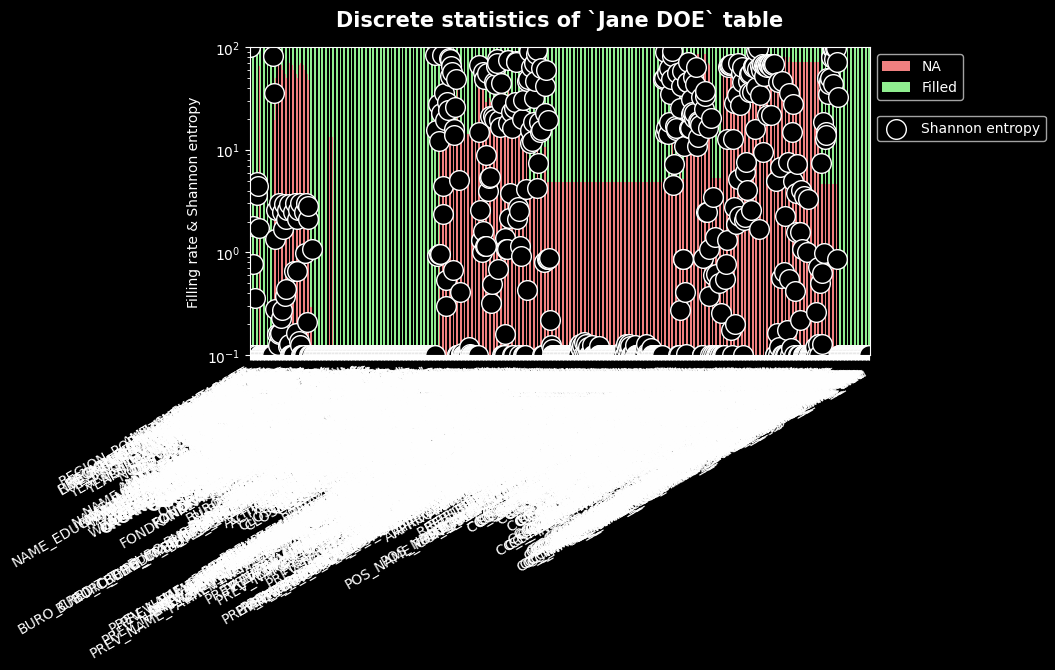

In [5]:
from pepper.utils import show_discrete_stats
# Analyse the dataset
data.info()
display(data.describe(include="all"))
show_discrete_stats(data)

#### Distinction des variables par nature

Ici ce sont les caractéritiques catégorielles vs. les numériques.

Pour notre jeu de données Home Credit, il s'agit d'abord de filtrer en fonction de l'importance.

In [9]:
from home_credit.prod import split_feats

target = "TARGET"
predict = "PREDICT"

# Distinguish numerical and categorical features
"""
A relevant criterion to distinguish between numerical and categorical features,
regardless of their technical dtype, is their number of unique values.
One can set a threshold to differentiate, especially in the gray area
of variables that are a bit of both categories, including some ordinals
that are thought of as cardinals (such as calendar data)."
"""
pks, cat_feats, num_feats = split_feats(data, nu_thres=24)
cat_feats.remove("TARGET")
print("primary keys:", pks)
print("numerical_features:", num_feats)
print("categorical_features:", cat_feats)

primary keys: ['SK_ID_CURR']
numerical_features: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI

#### Chargement du meilleur modèle obtenu

A cette heure (de mettre sous presse pour la soutenance), c'est le `lgbm_baseline_default_third_party`.

In [3]:
from home_credit.persist import load_model

model = load_model("lgbm_baseline_default_third_party")
display(model)

C:\Users\franc\Projects\pepper_credit_scoring_tool\modules\home_credit\persist.py:193: UserWarning: Using a non-skops.io save engine can potentially load malicious objects. It is recommended to use skops.io instead.
  warnings.warn(


LGBMClassifier(callbacks=None, colsample_bytree=0.9497036, learning_rate=0.02,
               max_depth=8, min_child_weight=39.3259775,
               min_split_gain=0.0222415, n_estimators=10000, n_jobs=4,
               num_leaves=34, reg_alpha=0.041545473, reg_lambda=0.0735294,
               subsample=0.8715623)

#### Prédictions du modèle

In [10]:
reference = data[data.TARGET > -1]
current = data[data.TARGET == -1]

ref_prediction = model.predict(reference[num_feats + cat_feats])
current_prediction = model.predict(current[num_feats + cat_feats])

reference['prediction'] = ref_prediction
current['prediction'] = current_prediction

#### Rapport de performance

In [ ]:
from home_credit.prod import get_col_map, report_performance, save_report
col_map = get_col_map("TARGET", "prediction", num_feats, cat_feats)
perf_report = report_performance(None, reference, col_map)
save_report(perf_report, "home_credit_ref_perf_report")

#### Rapport de datadrift

In [ ]:
from home_credit.prod import get_col_map, report_datadrift, save_report
drift_report = report_datadrift(reference, current, col_map)
save_report(drift_report, f"home_credit_datadrift_report")